# python第十一次作业

## 关于ENSO的计算

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

In [2]:
# ds = xr.open_dataset(r'E:\Work\Python\test9\sst.mnmean.nc')['sst']
ds = xr.open_dataset(r'sst.mnmean.nc')['sst']
ds

<xarray.DataArray 'sst' (time: 2016, lat: 89, lon: 180)>
[32296320 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

## 画图第一部分

In [3]:
winter = ds.loc[np.datetime64('2020-12-01'):np.datetime64('2021-02-01'), :, :]
winter = winter.mean(dim='time')
winter

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [4]:
lonw = winter['lon'].data
latw = winter['lat'].data

print(winter.max(), winter.min())

<xarray.DataArray 'sst' ()>
array(31.01062965) <xarray.DataArray 'sst' ()>
array(-1.79999983)


In [5]:
def drawmap():
    proj = ccrs.PlateCarree(central_longitude=180)
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
    # 海岸线
    ax.coastlines('110m')
    # 标注坐标轴
    majorticks = MultipleLocator(30)
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
                 linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
    return ax, fig

In [6]:
def drawpaper():  # 设置坐标轴样式，画图基本设置
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1)
    ax.set_xlabel('Time')
    ax.set_ylabel('Tmeperature')
    return ax, fig

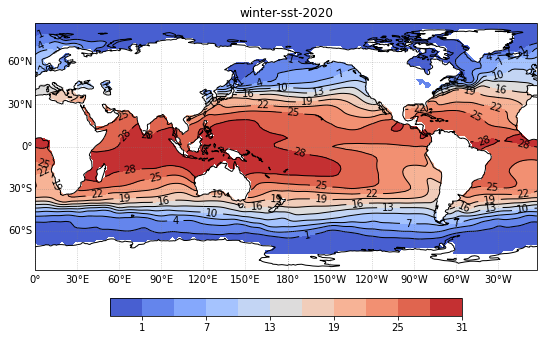

In [7]:
ax1, fig1 = drawmap()
line = ax1.contour(lonw, latw, winter, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax1.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax1.contourf(lonw, latw, winter, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax1.set_title('winter-sst-2020')
plt.show()

## 画图第二部分

In [8]:
enso_winter = ds.loc[:, 6: -6, 170:240]
lonew = enso_winter['lon'].data
latew = enso_winter['lat'].data
# print(enso_winter.max(), enso_winter.min())
enso_winter_2 = enso_winter.mean(dim='time')

In [9]:
enso_ave = ds.loc[:, 6: -6, 170:240].mean(dim=['lat', 'lon'], skipna=True)
enso_ave = enso_ave.groupby(enso_ave.time.dt.year).mean(dim='time')
enso_ave

<xarray.DataArray 'sst' (year: 168)>
array([27.243645, 27.7502  , 26.756119, 26.859377, 27.367493, 27.491041,
       26.873251, 26.691916, 26.65828 , 26.945307, 27.118624, 27.141695,
       27.116236, 27.035051, 27.044695, 26.769539, 26.340063, 27.236757,
       26.781487, 26.823637, 26.59266 , 26.892157, 27.102982, 28.46668 ,
       27.710617, 26.69963 , 27.165602, 27.648119, 27.393373, 27.4462  ,
       27.640112, 27.740211, 26.665482, 26.663887, 28.192068, 27.259905,
       26.547806, 27.465248, 26.74382 , 26.475882, 26.642458, 27.352072,
       27.972227, 27.449577, 26.783312, 27.439966, 28.068314, 27.328201,
       28.160593, 27.252121, 27.024687, 28.24398 , 27.159494, 27.14335 ,
       26.775518, 26.41075 , 26.182589, 27.222952, 27.497246, 27.350798,
       28.07501 , 27.481382, 26.270372, 25.76769 , 27.523397, 27.349154,
       27.457306, 26.991392, 26.816416, 27.399782, 26.84794 , 27.198362,
       27.508238, 27.020132, 27.22422 , 27.22906 , 27.915733, 27.506586,
       27.166258, 26.39463 , 26.798874, 27.09022 , 27.119356, 27.155703,
       26.367249, 27.085127, 28.255945, 28.507948, 27.09434 , 26.85138 ,
       27.39322 , 26.991995, 27.13502 , 27.32104 , 27.0469  , 26.802246,
       26.487272, 27.606771, 27.439653, 27.826607, 26.946228, 26.4545  ,
       26.769104, 27.944475, 28.084549, 27.51441 , 27.365076, 27.239946,
       27.103548, 27.766212, 26.917948, 27.914017, 27.826216, 27.229462,
       27.528818, 28.153673, 27.194244, 26.577803, 28.145302, 27.014854,
       26.64853 , 26.480658, 27.311888, 27.917215, 27.465586, 27.746857,
       27.827272, 27.37593 , 28.3536  , 27.908953, 27.16371 , 27.120165,
       27.83132 , 28.579523, 27.046083, 27.047995, 27.97635 , 28.347395,
       28.276228, 28.062555, 28.202555, 27.736246, 27.378252, 28.555153,
       27.5884  , 26.64184 , 26.92021 , 27.521187, 28.311197, 28.060308,
       28.200857, 27.89033 , 27.884245, 27.377996, 26.9717  , 28.036577,
       27.367699, 26.95662 , 27.6172  , 27.573732, 27.995947, 28.97418 ,
       28.165968, 27.692436, 27.915777, 28.336   , 27.615538, 27.186335],
      dtype=float32)
Coordinates:
  * year     (year) int64 1854 1855 1856 1857 1858 ... 2017 2018 2019 2020 2021

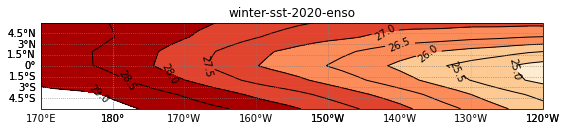

In [10]:
ax2, fig2 = drawmap()
majorticks = MultipleLocator(10)
# ax2.xaxis.set_major_locator(majorticks)
line = ax2.contour(lonew, latew, enso_winter_2, levels=np.arange(24, 31, 0.5), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax2.clabel(line, inline=True, fontsize=10, fmt='%.1f')
ax2.contourf(lonew, latew, enso_winter_2, levels=np.arange(24, 30, 1), cmap='OrRd', transform=ccrs.PlateCarree())
ax2.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, linestyle=':', 
             auto_inline=False, rotate_labels=False, xlocs=majorticks)
ax2.set_title('winter-sst-2020-enso')
plt.show()

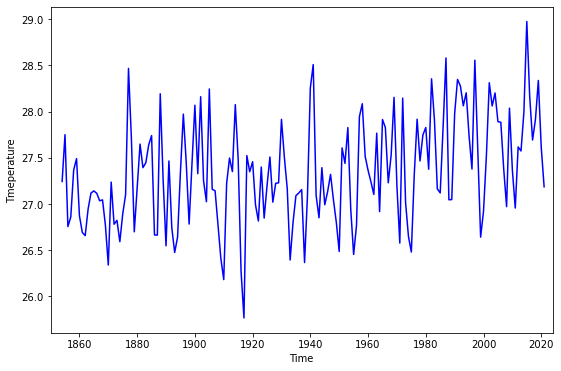

In [11]:
ax22, fig22 = drawpaper()
ax22.set_xlim(1850,2024)
ax22.plot(enso_ave['year'], enso_ave, color='b')
ax1.set_title('ENSO_Winter_plot')
plt.show()

## 画图第三部分

In [12]:
spring = ds.loc[np.datetime64('2020-03-01'):np.datetime64('2021-05-01'), :, :]
summer = ds.loc[np.datetime64('2020-06-01'):np.datetime64('2021-08-01'), :, :]
autumn = ds.loc[np.datetime64('2020-09-01'):np.datetime64('2021-11-01'), :, :]
spring = spring.mean(dim='time')
summer = summer.mean(dim='time')
autumn = autumn.mean(dim='time')
print(spring.max(), spring.min())
print(summer.max(), summer.min())
print(autumn.max(), autumn.min())

<xarray.DataArray 'sst' ()>
array(30.24056625) <xarray.DataArray 'sst' ()>
array(-1.79999971)
<xarray.DataArray 'sst' ()>
array(30.17523575) <xarray.DataArray 'sst' ()>
array(-1.79999971)
<xarray.DataArray 'sst' ()>
array(30.15940475) <xarray.DataArray 'sst' ()>
array(-1.79999971)


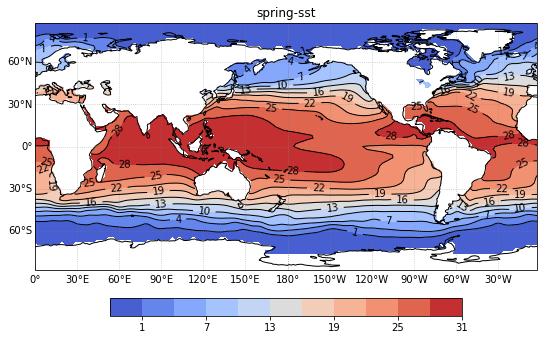

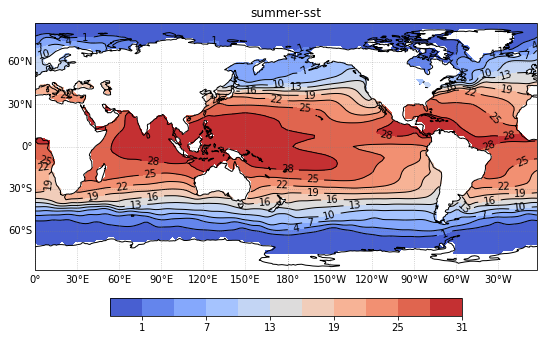

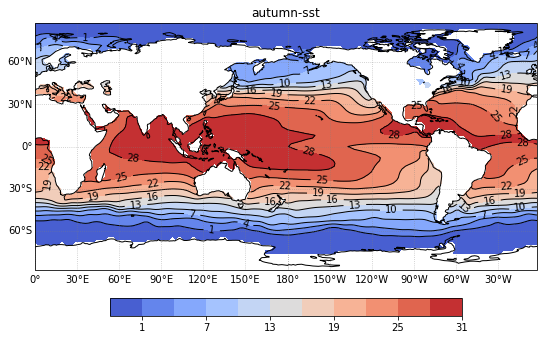

In [13]:
ax3, fig3 = drawmap()
line = ax3.contour(lonw, latw, spring, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax3.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax3.contourf(lonw, latw, spring, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig3.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax3.set_title('spring-sst')

ax4, fig4 = drawmap()
line = ax4.contour(lonw, latw, summer, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax4.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax4.contourf(lonw, latw, summer, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig4.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax4.set_title('summer-sst')

ax5, fig5 = drawmap()
line = ax5.contour(lonw, latw, autumn, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax5.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax5.contourf(lonw, latw, autumn, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig5.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax5.set_title('autumn-sst')
plt.show()

In [14]:
enso_season = ds.loc[:, 6:-6, 170:240].mean(dim=['lat', 'lon'], skipna=True)
enso_season = enso_season.groupby(enso_season.time.dt.season).mean(dim='time')
enso_season

<xarray.DataArray 'sst' (season: 4)>
array([27.04157 , 27.499899, 27.700958, 27.147804], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'